## Our Climate

### 1 Climate Change, Greenhouse Effect

(a) Calculate the equivalent blackbody temperature of the Earth assuming a planetary albedo (i.e. the fraction of the incident solar radiation that is reflected back into space without absorbtion) of $A = 0.30$. Assume that the Earth is in radiative equilibrium; i.e. that it experiences no net energy gain or loss due to radiative transfer. Think about the area over which radiation is incident vs. emitted.

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c

A = 0.3

F_sun = c.L_sun / (4*np.pi*(c.au**2))
P = F_sun * (np.pi*(c.R_earth**2))
F_earth = (1-A)*P/(4*np.pi*(c.R_earth**2))
T_bb = (F_earth/c.sigma_sb)**(1./4.)
print "The equivalent blackbody temperature of the Earth is", T_bb

The equivalent blackbody temperature of the Earth is 254.884691982 K


(b) The global mean surface air temperature is $T_A = 15\,^{\circ}\text{C}$ or $288\, \text{K}$. The difference is as you might have guessed due to the greenhouse effect. “Simulate” greenhouse effect by creating an atmospheric blanket close to the Earth’s surface, that is transparent to visible light, but mostly opaque to infrared with a transmission coefficient of $1 − A$. Approximately how much higher will the temperature be?

In [2]:
F_atm = (1-A)*F_earth
F_T = F_earth + F_atm
T_gh = (F_T/c.sigma_sb)**(1./4.)
print "The equivalent blackbody temperature of the Earth with greenhouse effect is", T_gh

The equivalent blackbody temperature of the Earth with greenhouse effect is 291.042212663 K


(c) Above calculation is obviously just a crude approximation, in reality the absorbtion $a(λ)$ is a function of wavelength. Write down correct equations on how you would calculate the expected temperature if $a(λ)$ was given (see example below). Assume that the absorbing layer is thin and close to the Earth’s surface. Write down expression such that you can simply plug into a numerical integrator. Make sure you indicate values for any quantity (other than physical constants).

$$F_s = \pi \int_0^{\infty} [1-a(\lambda)] B(\lambda,T) \, \text{d}\lambda$$

(d) While greenhouse effect is desirable, too much of it is catastrophic. Which part of the above equation shows the influence of increased concentration of greenhouse gasses? Using this information, which molecule is the most prominent greenhouse gas and why? Which one is the most problematic?

The atmospheric absorption $a(\lambda)$ is influenced by the increased concentration of greenhouse gases, and results in more heat being trapped, raising global temperatures.
Based on the absorption spectra figure, water vapor ($\mathrm{H_2O}$) is the most prominent greenhouse gas, while carbon dioxide ($\mathrm{CO}_2$) is the most problematic.

(e) Watch the time history of atmospheric carbon dioxide from 800,000 years ago until January, 2012. http://www.esrl.noaa.gov/gmd/ccgg/trends/history.html Are we in trouble?

Yes! Big trouble... :-(

### 2 El Niño, ENSO, and Correlations

(a) Using basemap http://matplotlib.org/basemap/users/examples.html plot the SST for January 1 of this year for the region where NINO3 is measured.

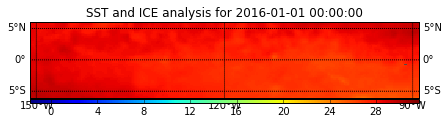

In [9]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
% matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-151.,llcrnrlat=-6.,urcrnrlon=-89.,urcrnrlat=6.,projection='mill',lon_0=-120,resolution=None)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,5.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,30.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

(b) Plot the NINO3 data as a function of time.

(1970, 2007)

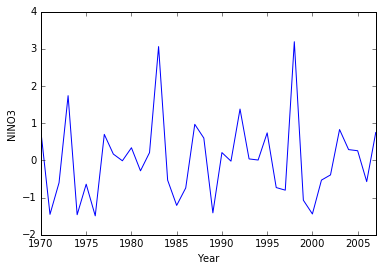

In [38]:
year,temp,precip,snow,nino3 = np.loadtxt("calidata_final.dat.txt", skiprows=1, unpack=True)

#sum = np.sum(temp)
#np.mean(temp)

plt.plot(year,nino3)
plt.xlabel("Year")
plt.ylabel("NINO3")
plt.xlim(1970,2007)

(c) When did the five largest El Niño events occur during this period?

In [28]:
nino3.sort()
print nino3

[-1.49 -1.46 -1.45 -1.44 -1.41 -1.21 -1.07 -0.8  -0.74 -0.73 -0.64 -0.6
 -0.57 -0.53 -0.53 -0.39 -0.28 -0.02 -0.01  0.01  0.04  0.17  0.21  0.21
  0.26  0.29  0.34  0.6   0.7   0.74  0.75  0.77  0.83  0.97  1.38  1.74
  3.06  3.19]


From largest to smallest NINO3: 1998, 1983, 1973, 1992, 1987

(d) ENSO impacts California through its influence on the subtropical jet stream. The table also contains data from the eastern Regional Climate Center (www.wrcc.dri.edu sercc.com) describing statewide temperature and precipitation data for California. You identified the 5 strongest El Niño events between 1970 and 2007. Do they relate to the extreme events in precipitation/temperature?

(<matplotlib.lines.Line2D at 0x10e20f150>,
 <matplotlib.lines.Line2D at 0x1273b23d0>)

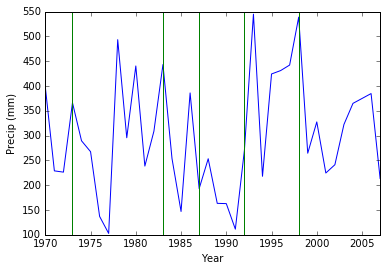

In [35]:
plt.plot(year,precip)
plt.xlabel("Year")
plt.ylabel("Precip (mm)")
plt.xlim(1970,2007)
plt.axvline(x=1998, color='g'), plt.axvline(x=1983, color='g'), plt.axvline(x=1973, color='g')
plt.axvline(x=1992, color='g'), plt.axvline(x=1987, color='g')

(<matplotlib.lines.Line2D at 0x111017710>,
 <matplotlib.lines.Line2D at 0x10e9b7490>)

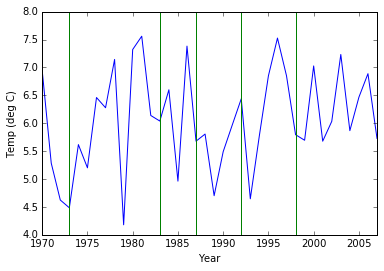

In [36]:
plt.plot(year,temp)
plt.xlabel("Year")
plt.ylabel("Temp (deg C)")
plt.xlim(1970,2007)
plt.axvline(x=1998, color='g'), plt.axvline(x=1983, color='g'), plt.axvline(x=1973, color='g')
plt.axvline(x=1992, color='g'), plt.axvline(x=1987, color='g')

Yes, they appear to (for the most part), but let's be more precise!

(e) Let’s be a bit more specific. Are temperature/precipitation/snow data CORRELATED with NINO3? Read Chapter 14.5 in Numerical Recipes http://www.nrbook.com/nr3/ and calculate correlation coefficients (use scipy.stats for example). What do these results suggest about the influence of ENSO on temperature and precipitation in California? Are snow and precipitation equaly strongly (anti)correlated with NINO3? Are these results consistent with the maps of impacts provided in the introduction?

In [42]:
import scipy.stats as sps

ntcc = sps.pearsonr(nino3,temp)[0]
npcc = sps.pearsonr(nino3,precip)[0]
nscc = sps.pearsonr(nino3,snow)[0]

print "The correlation coeffiction NINO3 and temperature is", ntcc
print "The correlation coeffiction NINO3 and precipitation is", npcc
print "The correlation coeffiction NINO3 and snowfall is", nscc


The correlation coeffiction NINO3 and temperature is 0.00511244585807
The correlation coeffiction NINO3 and precipitation is 0.37712170126
The correlation coeffiction NINO3 and Snowfall is 0.141972307605


These results suggest that, in California, temperature  is effectively uncorrelated to ENSO, while precipitation and snowfall are moderately and weakly correlated to ENSO, respectively. This is supported by the maps provided in the introduction, which show southern CA as "Wet" during El Niño conditions.

(f) The Climate Prediction Center (CPC) at the National Weather Service (NWS) maintains an excellent resource for real-time ENSO monitoring. Visit the page at: http://www.cpc.noaa.gov/products/precip/CWlink/MJO/enso.shtml
Scroll down to the Current Conditions section of the page to view some interesting ENSO animations. Click on the link titled SST Animation Tropical Pacific to view a 12-week animation of the recent SSTs. Briefly describe what the graphics show. Are we currently in a warm event, a neutral event, or a cold event?

We are currently in a warm event. (This has been an El Niño year, after all!)